# 10 Ordinary differential equations – Integrators
More about integrators to solve ODEs.

* Euler's Rule (and it's shortcomings) 
* Runge-Kutta methods

## Euler's Rule

From the last lecture: Given the $n$-dimensional vectors from the ODE standard form

$$
\frac{d\mathbf{y}}{dt} = \mathbf{f}(t, \mathbf{y})
$$
the **Euler rule** amounts to

\begin{align}
\mathbf{f}(t, \mathbf{y}) = \frac{d\mathbf{y}(t)}{dt} &\approx \frac{\mathbf{y}(t_{n+1}) - \mathbf{y}(t_n)}{h}\\
\mathbf{y}_{n+1} &\approx \mathbf{y}_n + h \mathbf{f}(t_n, \mathbf{y}_n) \quad \text{with} \quad \mathbf{y}_n := \mathbf{y}(t_n)
\end{align}

Euler's rule cannot obtain high precision without very small $h$ but this leads to higher round-off error accumulation.

### Euler's Rule applied to the 1D harmonic oscillator (theory)

\begin{alignat}{3}
f^{(0)}(t, \mathbf{y}) &= y^{(1)},
    &\quad y^{(0)}_0 &= x_0,\\
f^{(1)}(t, \mathbf{y}) &=   - \frac{k}{m} y^{(0)},
    &\quad y^{(1)}_0 &= v_0.
\end{alignat}

with $k=1$; $x_0 = 0$ and $v_0 = +1$.

First step from $t=0$ to $t=h$:

\begin{align}
y^{(0)}_1 &= y^{(0)}_0 + h y^{(1)}_0 = x_0 + v_0 h\\
y^{(1)}_1 &= y^{(1)}_0 + h \left(-\frac{k}{m}y^{(0)}_0\right) = v_0 + \frac{-k x_0}{m} h 
\end{align}

Compare to the equations of movement under a constant force (*ballistic motion*):

$$
x = x_0 + v_0 h + \frac{1}{2} a h^2, \quad v = v_0 + a h
$$

In Euler, the position does not even contain the $h^2$ term, i.e., the acceleration only contributes *indirectly* via the velocity of the *next* step. (Remember: Euler's error is $\mathcal{O}(h^2)$!)

### Euler's Rule: Application to 3 oscillators (numerical)

Open [integrators.py](https://github.com/ASU-CompMethodsPhysics-PHY494/PHY494-resources/blob/master/10_ODEs/integrators.py) to have a look at it: it contains code to integrate Newton's equations of motions for different forces and with different integrators (based on the work done in the last lecture).

We will complete `integrators.py` during the class together (when we need them), namely functions:
* `kinetic_energy()`
* `rk2()`
* `rk4()`

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

try:
    # if we have the solutions then use it
    import integrators_solution as integrators
except:
    # else ... sigh, we still have work to do
    import integrators

#### Integrate Newton's EOMs for different potentials with Euler
Use the `integrate_newton()` function (Euler is the default):

In [2]:
t_max = 20
t_harm, y_harm = integrators.integrate_newton(t_max=t_max)
t_anharm, y_anharm = integrators.integrate_newton(t_max=t_max, 
                                                  force=integrators.F_anharmonic)
t_power, y_power = integrators.integrate_newton(t_max=t_max,
                                                force=integrators.F_power)

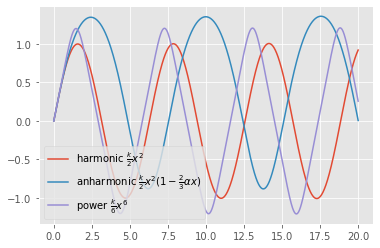

In [3]:
plt.plot(t_harm, y_harm[:, 0], label=r"harmonic $\frac{k}{2} x^2$")
plt.plot(t_anharm, y_anharm[:, 0], label=r"anharmonic $\frac{k}{2} x^2(1 - \frac{2}{3} \alpha x)$")
plt.plot(t_power, y_power[:, 0], label=r"power $\frac{k}{6} x^6$")
plt.legend(loc="best")

#### Phase-space portrait
Plot position against momentum ($x, p$):

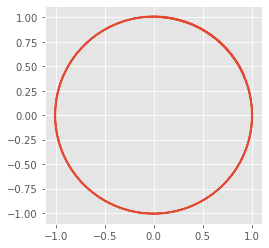

In [4]:
m = 1
x = y_harm[:, 0]
p = m * y_harm[:, 1]
ax = plt.subplot(1,1,1)
ax.plot(x, p)
ax.set_aspect(1)

In [5]:
t, y = integrators.integrate_newton(t_max=40, 
                                    force=integrators.F_harmonic, 
                                    h=0.01)
t2, y2 = integrators.integrate_newton(t_max=40, h=0.001,
                                      force=integrators.F_harmonic)

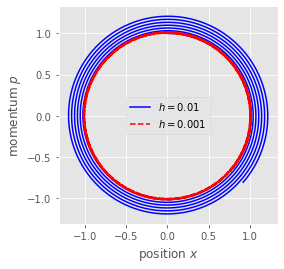

In [6]:
ax = plt.subplot(1,1,1)
ax.plot(y[:, 0], m * y[:, 1], 'b-', label=r"$h=0.01$")
ax.plot(y2[:, 0], m * y2[:, 1], 'r--', label="$h=0.001$")
ax.set_xlabel("position $x$")
ax.set_ylabel("momentum $p$")
ax.set_aspect(1)
ax.legend(loc="best")

#### Energy
Energy is conserved: stringent test for the integrator!

$$
E = T_\text{kin} + U\\
\frac{dE}{dt} = 0
$$
with $T_\text{kin} = \frac{1}{2} m v^2$.

Calculate and plot the three energy terms:

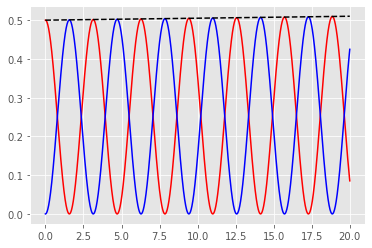

In [7]:
KE = 0.5 * m * y_harm[:, 1]**2
PE = integrators.U_harmonic(y_harm[:, 0])
energy = KE + PE
plt.plot(t_harm, KE, 'r-', t_harm, PE, 'b-', t_harm, energy, 'k--')

Harmonic oscillator with larger timestep $h=0.01$

In [8]:
m = 1
t, y = integrators.integrate_newton(t_max=500, force=integrators.F_harmonic, h=0.01, mass=m)
x, v = y.T
KE = 1/2 * m * v**2
PE = integrators.U_harmonic(x)
energy = KE + PE

Text(0.5, 1.0, 'Euler: harmonic oscillator')

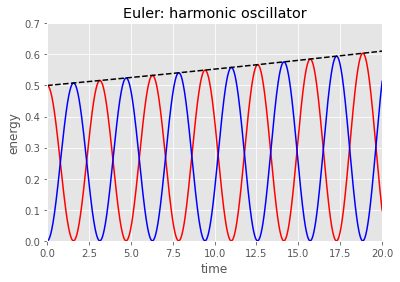

In [9]:
ax = plt.subplot(1,1,1)
ax.plot(t, KE, 'r-', t, PE, 'b-', t, energy, 'k--')
ax.set_xlim(0, 20)
ax.set_ylim(0, 0.7)
ax.set_xlabel("time")
ax.set_ylabel("energy")
ax.set_title("Euler: harmonic oscillator")

Note how energy conservation becomes worse when $h$ is increased.

For longer time scales, the energy just keeps on increasing — clearly, we are not solving the equations of motions in a physically meaningful way.

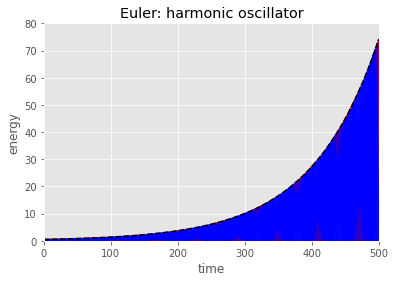

In [10]:
ax.set_ylim(0, 80)
ax.set_xlim(0,500)
ax.figure

##### Quantify energy drift
Measure the relative departure from energy conservation

$$
\epsilon_E(t) = \log_{10}\left|\frac{E(t) - E(t=0)}{E(t=0)}\right|
$$

(By using the decadic logarithm, $-\epsilon_E$ is a direct measure of the precision.)

###### Harmonic oscillator
Analyze energy drift for the last harmonic oscillator example ($h=0.01$):

/Users/oliver/anaconda3/envs/phy494/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


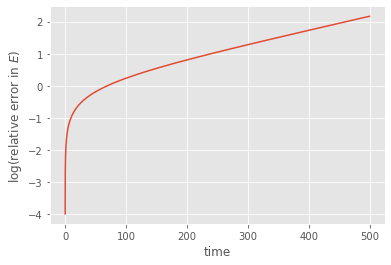

In [11]:
energy_precision = np.log10(np.abs(energy/energy[0] - 1))
plt.plot(t, energy_precision)
plt.ylabel("log(relative error in $E$)")
plt.xlabel("time");

As we already know, with such a large time step, energy conservation is very bad with the *Euler* integrator: The relative (!) error quickly becomes 100% (after $t=200$).

### Code re-use: energy analysis as a function: Application to power law oscillator
The module `integrators` contains the function `integrators.analyze_energies(t, y, U)` to automate the task of analysing the energy. You *must* provide the appropriate potential energy function `U`.

##### Problem: Make `analyze_energies()` work and analyze the power law oscillator
The code is *incomplete*.
1. Open `integrators.py` in your editor.
2. Complete the `kinetic_energy()` function (remember: $T_\text{kin} = \frac{1}{2} m v^2$)

Then `reload()` the module:

In [12]:
# when working on the integrator module you need to reload() whenever you make changes
from importlib import reload   # for Python 3
reload(integrators);

and try it out for power law oscillator with a large time step $h = 0.01$. Can you find a value of $h$ that will give you energy precision to 4th decimal over 40 time units?

###### Energy stability analysis of the 6-th power oscillator
$x^6$ potential with $h=0.01$:

In [13]:
t, y = integrators.integrate_newton(t_max=40, force=integrators.F_power, 
                                    h=0.01)

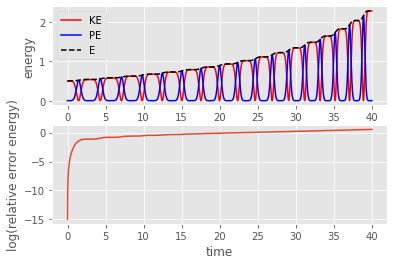

In [14]:
integrators.analyze_energies(t, y, integrators.U_power)

We can also plot the total energy along the trajectory, $E(x)$, in relationship to the potential energy $U(x)$:

In [15]:
x, v = y.T
E = integrators.kinetic_energy(v, m=1) + integrators.U_power(x)

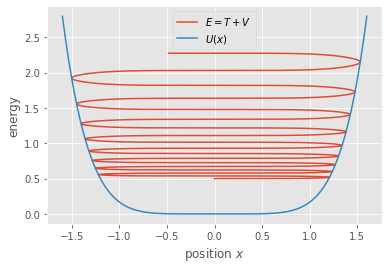

In [16]:
X = np.linspace(-1.6, 1.6, 100)
plt.plot(x, E, label=r"$E=T+V$")
plt.plot(X, integrators.U_power(X), label=r"$U(x)$")
plt.xlabel(r"position $x$")
plt.ylabel(r"energy")
plt.legend();

This looks terrible: the particle _should_ remain at a constant energy but instead its energy increases and it moves up in the potential.

Trying 100 times smaller $h$ (takes 100 times longer!!)

In [ ]:
t, y = integrators.integrate_newton(t_max=40, force=integrators.F_power, 
                                    h=0.0001)
integrators.analyze_energies(t, y, integrators.U_power)

*Reducing $h$ further does not seem to help and takes order of magnitude longer to run*. **We need a better integrator!**

## Runge-Kutta methods
Explicit RK methods propagate with the general form

$$
y_{n+1} = y_n + h \sum_{i=1}^s b_i k_i, \quad t_{n+1} = t_n + h
$$

where $s$ is the number of *stages* and the coefficients $a_{ij}$, $b_i$ and $c_i$ define the method.

\begin{align}
k_1 &= f(t_n, y_n)\\
k_2 &= f(t_n + c_2 h, y_n + h(a_{21} k_1))\\
k_3 &= f(t_n + c_3 h, y_n + h(a_{31} k_1 + a_{32} k_2))\\
 \vdots& \\
k_s &= f(t_n + c_s h, y_n + h(a_{s1} k_1 + a_{s2} k_2 + \cdots + a_{s,s-1} k_{s-1})). 
\end{align}

Basic idea: improve estimate for the slope by using weighted averages of slopes over the interval.

### RK2
`rk2` is simpler to derive and understand than `rk4` (which we will use more often).

Start with the exact solution

$$
\frac{dy}{dt} = f(t, y) \quad\text{and}\quad y(t) = \int f(t, y)dt\\
y_{n+1} = y_n + \int_{t_n}^{t_{n+1}} f(t, y)dt
$$

Expand $f(t, y)$ around *midpoint* $t_{n+1/2} = t + \frac{h}{2}$ of integration interval

\begin{gather}
f(t, y) \approx f(t_{n+1/2}, y_{n+1/2}) + (t - t_{n+1/2})\,  f^{(1)}(t_{n+1/2}) + 
   \mathcal{O}(h^2)
\end{gather}

Integrate the *expansion* (Taylor series around midpoint):
\begin{align}
\int_{t_n}^{t_{n+1}} f(t, y) \, dt &\approx h\, f(t_{n+1/2}, y_{n+1/2}) + \mathcal{O}(h^3)\\
y_{n+1} &= y_n + h\, f(t_{n+1/2}, y_{n+1/2}) + \mathcal{O}(h^3)
\end{align}

I.e., use **slope at midpoint**! (The $\mathcal{O}(h^2)$ term in the integral is zero because $[(h/2)^2 - (h/2)^2] = 0$.)

But we don't have $y_{n+1/2}$ so we use Euler's rule to estimate it to $\mathcal{O}(h^2)$:

$$
y_{n+1/2} \approx y_n + \frac{1}{2} h\, f(t_n, y_n)
$$

and insert into $y_{n+1} = y_n + h\, f(t_{n+1/2}, y_{n+1/2})$ (so it is still $\mathcal{O}(h^3)$ accurate).


Altogether: **RK2** algorithm

$$
\mathbf{y}_{n+1} = \mathbf{y}_n + h \mathbf{k}_2, \quad t_{n+1} = t_n + h
$$

and

\begin{align}
\mathbf{k}_1 &= \mathbf{f}(t_n, \mathbf{y}_n)\\
\mathbf{k}_2 &= \mathbf{f}(t_n + \frac{1}{2} h, \mathbf{y}_n + \frac{1}{2} h \mathbf{k}_1)
\end{align}

with $\mathcal{O}(h^3)$ accuracy.

#### RK2 applied to the 1D harmonic oscillator (theory)

\begin{alignat}{3}
f^{(0)}(t, \mathbf{y}) &= y^{(1)},
    &\quad y^{(0)}_0 &= x_0,\\
f^{(1)}(t, \mathbf{y}) &=   - \frac{k}{m} y^{(0)},
    &\quad y^{(1)}_0 &= v_0.
\end{alignat}

with $k=1$; $x_0 = 0$ and $v_0 = +1$.

First step from $t=0$ to $t=h$:

\begin{align}
  y^{(0)}_{1} &= 
    y^{(0)} _{0} + hf^{(0)} \Big(\frac{h}{2}, y^{(0)}_{0} + hk_{1} \Big)\\
    &= x_{0} + h\left[v_{0} + \frac{h}{2} \left(-\frac{k}{m} x_{0}\right)  \right]\\
    &= x_0 + v_0 h + \frac{1}{2} \left(-\frac{k}{m} x_{0}\right) h^2\\
  y^{(1)}_{1} &= y^{(1)}_{0} + 
                h f^{(1)}\left(\frac{h}{2}, 
                     \mathbf{y}_{0} + \frac{h}{2} \mathbf{f}(0, \mathbf{y}_{0})\right) \\
             &= v_{0} + \frac{h}{m} \left[-k\left(x_{0} - \frac{h}{2} k x_{0}\right)\right]
\end{align}

Note that `rk2` contains a $h^2$ term in the position update.

#### RK2 applied in practice 
Let's implement `rk2` 

\begin{align}
\mathbf{y}_{n+1} &= \mathbf{y}_n + h \mathbf{k}_2\\
\mathbf{k}_1 &= \mathbf{f}(t_n, \mathbf{y}_n)\\
\mathbf{k}_2 &= \mathbf{f}(t_n + \frac{1}{2} h, \mathbf{y}_n + \frac{1}{2} h \mathbf{k}_1)
\end{align}

in our `integrators.py`.

In [ ]:
from importlib import reload
reload(integrators);

##### RK2 for the power potential

In [ ]:
t, y = integrators.integrate_newton(t_max=40, force=integrators.F_power, 
                                    integrator=integrators.rk2, h=0.01)

###### phase-space portrait

In [ ]:
plt.plot(y[:, 0], m*y[:, 1])

###### energy drift 

In [ ]:
integrators.analyze_energies(t, y, integrators.U_power)

### RK4
General purpose ODE solver.

$$
y_{n+1} = y_n + \frac{h}{6}\Big(k_1 + 2 k_2 + 2 k_3 + k_4\Big), \quad t_{n+1} = t_n + h
$$

and

\begin{align}
k_1 &= f(t_n, y_n)\\
k_2 &= f(t_n + \frac{1}{2} h, y_n + \frac{1}{2} h k_1)\\
k_3 &= f(t_n + \frac{1}{2} h, y_n + \frac{1}{2} h k_2)\\
k_4 &= f(t_n + h, y_n + h k_3)
\end{align}

`rk4` can obtain $\mathcal{O}(h^4)$ precision.

#### RK4 applied in practice
Implement `rk4` in `integrator.py`:

\begin{align}
y_{n+1} &= y_n + \frac{h}{6}\Big(k_1 + 2 k_2 + 2 k_3 + k_4\Big)\\
k_1 &= f(t_n, y_n)\\
k_2 &= f(t_n + \frac{1}{2} h, y_n + \frac{1}{2} h k_1)\\
k_3 &= f(t_n + \frac{1}{2} h, y_n + \frac{1}{2} h k_2)\\
k_4 &= f(t_n + h, y_n + h k_3)
\end{align}

In [ ]:
reload(integrators)

and test the 6th power potential again. What level of energy precision can you obtain over 40 time units?

##### RK4 for the 6th power potential
Note that we can easily run `rk4` with a $h=0.01$!

In [ ]:
t, y = integrators.integrate_newton(t_max=40, force=integrators.F_power, 
                                    integrator=integrators.rk4, h=0.01)

###### phase-space protrait

In [ ]:
plt.plot(y[:, 0], m*y[:, 1])

###### energy drift

In [ ]:
integrators.analyze_energies(t, y, integrators.U_power)

You should be able to get 8 - 11 decimals precision from `rk4` with a smaller $h$.

##### High precision RK4 for the 6th power potential
Try a 10 times smaller step $h=0.001$

In [ ]:
t, y = integrators.integrate_newton(t_max=40, force=integrators.F_power, 
                                    integrator=integrators.rk4, h=0.001)
integrators.analyze_energies(t, y, integrators.U_power)

This looks like stable integration with an error of not worse than $10^{-12}$: *Looking very good!* (Especially when you compare it to *Euler* with $h=0.001$!)

The error spikes when the potential energy is dominant, which happens near the classical turning points where (in this case) the potential is the steepest and the forces are highest.

In [ ]:
x, v = y.T
E = integrators.kinetic_energy(v, m=1) + integrators.U_power(x)

In [ ]:
X = np.linspace(-1.3, 1.3, 100)
plt.plot(x, E, label=r"$E=T+V$")
plt.plot(X, integrators.U_power(X), label=r"$U(x)$")
plt.xlabel(r"position $x$")
plt.ylabel(r"energy")
plt.legend()

In [ ]:
X = np.linspace(-1.3, 1.3, 100)
plt.plot(x, E, label=r"$E=T+V$")
plt.plot(X, integrators.U_power(X), label=r"$U(x)$")
plt.xlabel(r"position $x$")
plt.ylabel(r"energy")
plt.legend()
eps = 2e-13
plt.ylim(0.5 - eps, 0.5 + eps)